In [1]:
from epengine.models.inference import (
    SBEMInferenceRequestSpec,
    SBEMInferenceSavingsRequestSpec,
)

/Users/daryaguettler/epengine/.venv/lib/python3.12/site-packages/archetypal/__init__.py:16: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


In [13]:
lat = 42.3601
lon = -71.0589
short_edge = 12
long_edge = 12
num_floors = 2
x_0 = 5
y_0 = 0
x_1 = x_0 + short_edge
y_1 = y_0 + long_edge


spec = SBEMInferenceRequestSpec(
    lat=lat,
    lon=lon,
    rotated_rectangle=f"POLYGON (({x_0} {y_0}, {x_0} {y_1}, {x_1} {y_1}, {x_1} {y_0}, {x_0} {y_0}))",
    neighbor_polys=["POLYGON ((-10 0, -10 10, -5 10, -5 0, -10 0))"],
    neighbor_floors=[3],
    short_edge=short_edge,
    long_edge=long_edge,
    num_floors=num_floors,
    orientation=0.000,
    basement="occupied_conditioned",
    attic="none",
    semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ACCentral",
        "Heating": "NaturalGasHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "AirDuctsUninsulated",
        # equip/lights/etc
        "Equipment": "LowEfficiencyEquipment",
        "Lighting": "NoLED",
        "Thermostat": "NoControls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePane",
        "OnsiteSolar": "NoSolarPV",
    },
    county="Middlesex",
    source_experiment="ma-webapp/v4-20250814-163347/iter-003/train/0/models",
    current_solar_size_kW=0,
    # upgraded_solar_coverage=0.3,
    actual_conditioned_area_m2=500,
)

# results = spec.run(n=1000)
savings_spec = SBEMInferenceSavingsRequestSpec(
    original=spec,
    upgraded_semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ACCentral",
        "Heating": "NaturalGasHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "AirDuctsUninsulated",
        # equip/lights/etc
        "Equipment": "LowEfficiencyEquipment",
        "Lighting": "NoLED",
        "Thermostat": "NoControls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "InsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePane",
        "OnsiteSolar": "NoSolarPV",
    },
)

results_costs_check = savings_spec.run(n=5)
original_results_costs_check = results_costs_check["original"]
new_results_costs_check = results_costs_check["upgraded"]
delta_results_costs_check = results_costs_check["delta"]
retrofit_result_costs_check = results_costs_check["retrofit"]

## Test cost and incentive integration - no solar

In [14]:
original_results_costs_check.disaggregations_summary

Normalization Normalized                                                      \
Dataset              Raw                                                       
Segment          Cooling Domestic Hot Water  Equipment    Heating   Lighting   
mean           36.360805          12.418213  13.503704  18.506631  10.704610   
std             2.937019           0.228907   0.258615   1.237875   0.199782   
min            31.593867          12.197425  13.295527  17.247827  10.552576   
5%             32.393764          12.214695  13.300904  17.322061  10.553050   
10%            33.193661          12.231965  13.306281  17.396294  10.553525   
25%            35.593353          12.283775  13.322411  17.618994  10.554950   
50%            37.401896          12.307702  13.352997  18.289954  10.609322   
75%            38.527187          12.545951  13.667224  19.010787  10.788513   
90%            38.623510          12.672107  13.795106  19.823670  10.926020   
95%            38.655617          12.714159  13.837734  20.094631  10.971855   
max            38.687724          12.756211  13.880361  20.365592  11.017691   

Normalization                                                                 \
Dataset           EndUse                                                       
Segment          Cooling Domestic Hot Water  Equipment    Heating   Lighting   
mean           15.977271          24.843951  13.503704  33.938596  10.704610   
std             3.156933           2.646468   0.258615   7.098867   0.199782   
min            12.247056          21.079244  13.295527  27.352118  10.552576   
5%             12.641506          21.481975  13.300904  27.805644  10.553050   
10%            13.035957          21.884707  13.306281  28.259170  10.553525   
25%            14.219309          23.092901  13.322411  29.619749  10.554950   
50%            15.582036          26.033355  13.352997  32.503749  10.609322   
75%            17.276345          26.970838  13.667224  34.570503  10.788513   
90%            19.247504          27.014386  13.795106  41.216317  10.926020   
95%            19.904557          27.028902  13.837734  43.431589  10.971855   
max            20.561610          27.043418  13.880361  45.646860  11.017691   

Normalization  ...           Gross                                      \
Dataset        ... EndUseEmissions               FuelCost                
Segment        ...         Heating  Lighting  Electricity   NaturalGas   
mean           ...        4.173282  3.151442  6132.681182  1944.152936   
std            ...        0.985581  0.280517   546.789766   219.257619   
min            ...        3.186307  2.950852  5172.573951  1650.335778   
5%             ...        3.285678  2.969146  5380.664394  1696.546105   
10%            ...        3.385049  2.987439  5588.754836  1742.756432   
25%            ...        3.683162  3.042319  6213.026165  1881.387412   
50%            ...        4.044387  3.053588  6349.183363  1904.763664   
75%            ...        4.150163  3.063689  6444.003230  2037.069481   
90%            ...        5.141500  3.413531  6468.372813  2163.152800   
95%            ...        5.471945  3.530145  6476.496007  2205.180573   
max            ...        5.802391  3.646759  6484.619202  2247.208346   

Normalization                                                                   
Dataset                           FuelEmissions                                 
Segment       NetElectricity  Oil   Electricity NaturalGas NetElectricity  Oil  
mean             6132.681182  0.0      5.895818   7.216148       5.895818  0.0  
std               546.789766  0.0      0.381654   0.952245       0.381654  0.0  
min              5172.573951  0.0      5.512991   5.876448       5.512991  0.0  
5%               5380.664394  0.0      5.516191   6.085231       5.516191  0.0  
10%              5588.754836  0.0      5.519390   6.294014       5.519390  0.0  
25%              6213.026165  0.0      5.528987   6.920363       5.528987

In [15]:
new_results_costs_check.disaggregations_summary

Normalization Normalized                                                      \
Dataset              Raw                                                       
Segment          Cooling Domestic Hot Water  Equipment    Heating   Lighting   
mean           38.376584          12.418213  13.503704  16.036632  10.704764   
std             2.843997           0.228907   0.258615   1.127070   0.200259   
min            33.770933          12.197425  13.295527  14.968345  10.552493   
5%             34.546374          12.214695  13.300904  15.016950  10.552967   
10%            35.321815          12.231965  13.306281  15.065555  10.553442   
25%            37.648138          12.283775  13.322411  15.211370  10.554867   
50%            39.293009          12.307702  13.352997  15.824079  10.609239   
75%            40.505150          12.545951  13.667224  16.384048  10.788382   
90%            40.601472          12.672107  13.795106  17.230809  10.926655   
95%            40.633580          12.714159  13.837734  17.513063  10.972746   
max            40.665687          12.756211  13.880361  17.795317  11.018837   

Normalization                                                                 \
Dataset           EndUse                                                       
Segment          Cooling Domestic Hot Water  Equipment    Heating   Lighting   
mean           16.857394          24.843951  13.503704  29.422943  10.704764   
std             3.253075           2.646468   0.258615   6.297297   0.200259   
min            13.090974          21.079244  13.295527  23.664470  10.552493   
5%             13.460432          21.481975  13.300904  24.072614  10.552967   
10%            13.829891          21.884707  13.306281  24.480757  10.553442   
25%            14.938265          23.092901  13.322411  25.705187  10.554867   
50%            16.481579          26.033355  13.352997  28.012674  10.609239   
75%            18.163303          26.970838  13.667224  29.846465  10.788382   
90%            20.233031          27.014386  13.795106  35.870138  10.926655   
95%            20.922941          27.028902  13.837734  37.878029  10.972746   
max            21.612851          27.043418  13.880361  39.885919  11.018837   

Normalization  ...           Gross                                      \
Dataset        ... EndUseEmissions               FuelCost                
Segment        ...         Heating  Lighting  Electricity   NaturalGas   
mean           ...        3.618333  3.151496  6266.530349  1795.180570   
std            ...        0.872605  0.280696   556.445024   197.994159   
min            ...        2.756725  2.950829  5290.251963  1529.692415   
5%             ...        2.844659  2.969122  5503.152458  1571.617760   
10%            ...        2.932592  2.987415  5716.052953  1613.543105   
25%            ...        3.196394  3.042295  6354.754437  1739.319140   
50%            ...        3.491724  3.053551  6468.990624  1770.785247   
75%            ...        3.576731  3.063665  6580.941300  1861.194739   
90%            ...        4.472746  3.413750  6615.004571  1989.424681   
95%            ...        4.771418  3.530444  6626.358995  2032.167995   
max            ...        5.070090  3.647139  6637.713419  2074.911309   

Normalization                                                                   
Dataset                           FuelEmissions                                 
Segment       NetElectricity  Oil   Electricity NaturalGas NetElectricity  Oil  
mean             6266.530349  0.0      6.025050   6.661199       6.025050  0.0  
std               556.445024  0.0      0.397184   0.842623       0.397184  0.0  
min              5290.251963  0.0      5.633317   5.446866       5.633317  0.0  
5%               5503.152458  0.0      5.634404   5.644212       5.634404  0.0  
10%              5716.052953  0.0      5.635491   5.841558       5.635491  0.0  
25%              6354.754437  0.0      5.638751   6.433595       5.638751

In [16]:
lat = 42.3601
lon = -71.0589
short_edge = 12
long_edge = 12
num_floors = 2
x_0 = 5
y_0 = 0
x_1 = x_0 + short_edge
y_1 = y_0 + long_edge


spec = SBEMInferenceRequestSpec(
    lat=lat,
    lon=lon,
    rotated_rectangle=f"POLYGON (({x_0} {y_0}, {x_0} {y_1}, {x_1} {y_1}, {x_1} {y_0}, {x_0} {y_0}))",
    neighbor_polys=["POLYGON ((-10 0, -10 10, -5 10, -5 0, -10 0))"],
    neighbor_floors=[3],
    short_edge=short_edge,
    long_edge=long_edge,
    num_floors=num_floors,
    orientation=0.000,
    basement="none",
    attic="none",
    semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ACCentral",
        "Heating": "NaturalGasHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "AirDuctsUninsulated",
        # equip/lights/etc
        "Equipment": "LowEfficiencyEquipment",
        "Lighting": "NoLED",
        "Thermostat": "NoControls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePane",
        "OnsiteSolar": "NoSolarPV",
    },
    county="Middlesex",
    source_experiment="ma-webapp/v4-20250814-163347/iter-003/train/0/models",
    current_solar_size_kW=0,
    # upgraded_solar_coverage=0.3,
    actual_conditioned_area_m2=500,
)

# results = spec.run(n=1000)
savings_spec = SBEMInferenceSavingsRequestSpec(
    original=spec,
    upgraded_semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ASHPCooling",
        "Heating": "ASHPHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "AirDuctsUninsulated",
        # equip/lights/etc
        "Equipment": "LowEfficiencyEquipment",
        "Lighting": "LED",
        "Thermostat": "Controls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "DoublePaneLowE",
        "OnsiteSolar": "NoSolarPV",
    },
)

results_costs_check = savings_spec.run(n=5)
original_results_costs_check = results_costs_check["original"]
new_results_costs_check = results_costs_check["upgraded"]
delta_results_costs_check = results_costs_check["delta"]
retrofit_result_costs_check = results_costs_check["retrofit"]

In [17]:
retrofit_result_costs_check.costs_summary

,cost.Lighting.LED,cost.Windows.DoublePaneLowE,cost.Thermostat.Controls,cost.Cooling.ASHPCooling,cost.Heating.ASHPHeating,cost.Lighting,cost.Windows,cost.Thermostat,cost.Cooling,cost.Heating,...,cost.Weatherization,cost.AtticFloorInsulation,cost.Equipment,cost.RoofInsulation,cost.BasementCeilingInsulation,cost.BasementWallsInsulation,cost.DHW,cost.Walls,cost.Distribution,payback
mean,3246.852063,27002.192984,490.619834,323.194353,12558.980103,3246.852063,27002.192984,490.619834,323.194353,12558.980103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.522502
std,112.716548,3808.187831,8.980122,10.460240,984.244200,112.716548,3808.187831,8.980122,10.460240,984.244200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.281638
min,3143.528164,21399.899761,480.256675,306.982570,11481.764501,3143.528164,21399.899761,480.256675,306.982570,11481.764501,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.309984
p5,3143.891309,22221.715275,480.848011,309.695607,11606.984820,3143.891309,22221.715275,480.848011,309.695607,11606.984820,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.463498
p10,3144.254454,23043.530788,481.439347,312.408644,11732.205139,3144.254454,23043.530788,481.439347,312.408644,11732.205139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.617013
p25,3145.343888,25508.977327,483.213355,320.547754,12107.866095,3145.343888,25508.977327,483.213355,320.547754,12107.866095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.077557
p50,3230.106409,27784.761343,490.897605,325.888831,12109.132240,3230.106409,27784.761343,490.897605,325.888831,12109.132240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.084021
p75,3307.583049,28770.359671,497.460576,327.406940,13128.489808,3307.583049,28770.359671,497.460576,327.406940,13128.489808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.449435
p90,3367.652501,30436.323959,499.746807,332.050178,13631.984646,3367.652501,30436.323959,499.746807,332.050178,13631.984646,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.794680
p95,3387.675652,30991.645388,500.508884,333.597924,13799.816258,3387.675652,30991.645388,500.508884,333.597924,13799.816258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.243096


In [4]:
print("Top-level keys in results_costs_check:")
print(list(results_costs_check.keys()))

for key in results_costs_check:
    val = results_costs_check[key]
    if hasattr(val, "costs"):
        print(f"\nColumns in results_costs_check['{key}'].costs:")
        print(val.costs.columns.tolist())
    if hasattr(val, "paybacks"):
        print(f"\nColumns in results_costs_check['{key}'].paybacks:")
        print(val.paybacks.columns.tolist())

Top-level keys in results_costs_check:
['original', 'upgraded', 'delta', 'retrofit', 'retrofit_with_incentives_incomeeligible', 'retrofit_with_incentives_allcustomers']

Columns in results_costs_check['retrofit'].costs:
['cost.Lighting.LED', 'cost.Windows.DoublePaneLowE', 'cost.Heating.ASHPHeating', 'cost.Thermostat.Controls', 'cost.Cooling.ASHPCooling', 'cost.Total', 'cost.Equipment', 'cost.AtticFloorInsulation', 'cost.BasementCeilingInsulation', 'cost.Thermostat', 'cost.Windows', 'cost.Lighting', 'cost.Heating', 'cost.Weatherization', 'cost.OnsiteSolar', 'cost.Cooling', 'cost.BasementWallsInsulation', 'cost.Walls', 'cost.Distribution', 'cost.DHW', 'cost.RoofInsulation', 'payback']

Columns in results_costs_check['retrofit'].paybacks:
['payback']

Columns in results_costs_check['retrofit_with_incentives_incomeeligible'].costs:
['cost.Lighting.LED', 'cost.Windows.DoublePaneLowE', 'cost.Heating.ASHPHeating', 'cost.Thermostat.Controls', 'cost.Cooling.ASHPCooling', 'cost.Total', 'cost.Equ

In [5]:
results_costs_check["retrofit"].costs_summary.payback

mean     9.272688
std      1.505626
min      7.784760
p5       7.978526
p10      8.172291
p25      8.753588
p50      8.855941
p75      9.166770
p90     10.748137
p95     11.275260
max     11.802382
Name: payback, dtype: float64

In [15]:
results_costs_check["retrofit"].costs

,cost.Lighting.LED,cost.Windows.DoublePaneLowE,cost.Heating.ASHPHeating,cost.Thermostat.Controls,cost.Cooling.ASHPCooling,cost.Total,cost.Equipment,cost.AtticFloorInsulation,cost.BasementCeilingInsulation,cost.Thermostat,...,cost.Heating,cost.Weatherization,cost.OnsiteSolar,cost.Cooling,cost.BasementWallsInsulation,cost.Walls,cost.Distribution,cost.DHW,cost.RoofInsulation,payback
0,3114.723761,29764.278575,11482.061043,510.783068,333.151094,45204.997541,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.166770
1,3244.403248,26205.328110,13538.479414,484.596785,280.108075,43752.915632,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.753588
2,3401.751865,29841.060268,12681.091750,506.634518,349.165257,46779.703657,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.855941
3,3201.963479,29093.957385,12255.637706,490.160579,364.261623,45405.980773,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.784760
4,3480.957787,21830.773750,11981.246426,481.561305,358.931789,38133.471058,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.802382


In [18]:
results_costs_check["retrofit_with_incentives_allcustomers"].costs_summary.payback

mean    6.569150
std     0.835745
min     5.607372
p5      5.728441
p10     5.849509
p25     6.212716
p50     6.451683
p75     6.696465
p90     7.405093
p95     7.641303
max     7.877512
Name: payback, dtype: float64

In [16]:
results_costs_check["retrofit_with_incentives_allcustomers"].costs_summary

,cost.Lighting.LED,cost.Windows.DoublePaneLowE,cost.Heating.ASHPHeating,cost.Thermostat.Controls,cost.Cooling.ASHPCooling,cost.Total,cost.Equipment,cost.AtticFloorInsulation,cost.BasementCeilingInsulation,cost.Thermostat,...,incentive.DHW,net_cost.Thermostat.Controls,net_cost.Heating.ASHPHeating,net_cost.Windows.DoublePaneLowE,net_cost.Total,net_cost.Thermostat,net_cost.Windows,net_cost.Heating,net_cost.DHW,payback
mean,3288.760028,27347.079618,12387.703268,494.747251,337.123568,43855.413732,0.0,0.0,0.0,0.0,...,0.0,394.747251,495.041774,26747.079618,31262.752238,0.0,0.0,0.0,0.0,6.569150
std,149.580180,3422.265300,776.723705,13.194632,33.998610,3373.730872,0.0,0.0,0.0,0.0,...,0.0,13.194632,646.301734,3422.265300,3425.004927,0.0,0.0,0.0,0.0,0.835745
min,3114.723761,21830.773750,11482.061043,481.561305,280.108075,38133.471058,0.0,0.0,0.0,0.0,...,0.0,381.561305,0.000000,21230.773750,25452.224632,0.0,0.0,0.0,0.0,5.607372
p5,3132.171705,22705.684622,11581.898119,482.168401,290.716679,39257.359973,0.0,0.0,0.0,0.0,...,0.0,382.168401,0.000000,22105.684622,26572.362832,0.0,0.0,0.0,0.0,5.728441
p10,3149.619648,23580.595494,11681.735196,482.775497,301.325283,40381.248887,0.0,0.0,0.0,0.0,...,0.0,382.775497,0.000000,22980.595494,27692.501032,0.0,0.0,0.0,0.0,5.849509
p25,3201.963479,26205.328110,11981.246426,484.596785,333.151094,43752.915632,0.0,0.0,0.0,0.0,...,0.0,384.596785,0.000000,25605.328110,31052.915632,0.0,0.0,0.0,0.0,6.212716
p50,3244.403248,29093.957385,12255.637706,490.160579,349.165257,45204.997541,0.0,0.0,0.0,0.0,...,0.0,390.160579,255.637706,28493.957385,32705.980773,0.0,0.0,0.0,0.0,6.451683
p75,3401.751865,29764.278575,12681.091750,506.634518,358.931789,45405.980773,0.0,0.0,0.0,0.0,...,0.0,406.634518,681.091750,29164.278575,33022.936498,0.0,0.0,0.0,0.0,6.696465
p90,3449.275418,29810.347591,13195.524348,509.123648,362.129690,46230.214503,0.0,0.0,0.0,0.0,...,0.0,409.123648,1195.524348,29210.347591,33656.996793,0.0,0.0,0.0,0.0,7.405093
p95,3465.116603,29825.703929,13367.001881,509.953358,363.195657,46504.959080,0.0,0.0,0.0,0.0,...,0.0,409.953358,1367.001881,29225.703929,33868.350225,0.0,0.0,0.0,0.0,7.641303


In [ ]:
from pprint import pprint

# Display the full content of the 'incentive.metadata.IncomeEligible' column for all rows
metadata_col = results_costs_check["retrofit_with_incentives_allcustomers"].costs[
    "incentive.metadata"
]
for idx, val in metadata_col.items():
    print(f"Row {idx}:")
    pprint(val)
    print("-" * 40)

Row 0:
[{'amount_applied': 100.0,
  'factor_type': 'LinearQuantity',
  'final': 'Controls',
  'program_name': 'MassSave smart thermostat rebate for all customers',
  'source': 'MassSave',
  'trigger': 'Thermostat'},
 {'amount_applied': 10000.0,
  'factor_type': 'LinearQuantity',
  'final': 'ASHPHeating',
  'program_name': 'MassSave ASHP rebate for all customers',
  'source': 'MassSave',
  'trigger': 'Heating'},
 {'amount_applied': 2000.0,
  'factor_type': 'PercentQuantity',
  'final': 'ASHPHeating',
  'program_name': 'IRA 30% tax credit for ASHP, capped at $2000',
  'source': 'IRA',
  'trigger': 'Heating'},
 {'amount_applied': 600.0,
  'factor_type': 'PercentQuantity',
  'final': 'DoublePaneLowE',
  'program_name': 'IRA 30% tax credit for energy efficient windows, capped at '
                  '$600',
  'source': 'IRA',
  'trigger': 'Windows'}]
----------------------------------------
Row 1:
[{'amount_applied': 100.0,
  'factor_type': 'LinearQuantity',
  'final': 'Controls',
  'program

In [10]:
retrofit_result_costs_check.costs_summary

,cost.Lighting.LED,cost.Windows.DoublePaneLowE,cost.Heating.ASHPHeating,cost.Thermostat.Controls,cost.Cooling.ASHPCooling,cost.Total,cost.Equipment,cost.AtticFloorInsulation,cost.BasementCeilingInsulation,cost.Thermostat,...,cost.Heating,cost.Weatherization,cost.OnsiteSolar,cost.Cooling,cost.BasementWallsInsulation,cost.Walls,cost.Distribution,cost.DHW,cost.RoofInsulation,payback
mean,3288.760028,27347.079618,12387.703268,494.747251,337.123568,43855.413732,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.272688
std,149.580180,3422.265300,776.723705,13.194632,33.998610,3373.730872,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.505626
min,3114.723761,21830.773750,11482.061043,481.561305,280.108075,38133.471058,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.784760
p5,3132.171705,22705.684622,11581.898119,482.168401,290.716679,39257.359973,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.978526
p10,3149.619648,23580.595494,11681.735196,482.775497,301.325283,40381.248887,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.172291
p25,3201.963479,26205.328110,11981.246426,484.596785,333.151094,43752.915632,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.753588
p50,3244.403248,29093.957385,12255.637706,490.160579,349.165257,45204.997541,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.855941
p75,3401.751865,29764.278575,12681.091750,506.634518,358.931789,45405.980773,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.166770
p90,3449.275418,29810.347591,13195.524348,509.123648,362.129690,46230.214503,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.748137
p95,3465.116603,29825.703929,13367.001881,509.953358,363.195657,46504.959080,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.275260


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten all cost columns (excluding incentives) into a single Series for KDE plot
costs_total = retrofit_result_costs_check.costs[
    ["cost.Total", "net_cost.Total.IncomeEligible", "net_cost.Total.AllCustomers"]
]
plt.figure(figsize=(15, 10))
sns.kdeplot(costs_total, fill=True, palette="viridis", label="Total Cost")
for _i, col in enumerate(costs_total.columns):
    median_val = costs_total[col].median()
    plt.axvline(
        median_val,
        color="black",
        linestyle="--",
        linewidth=2,
        label=f"Median {col}: {median_val:.0f}",
    )
    plt.text(
        median_val,
        plt.ylim()[1] * 0.9,
        f"{median_val:.0f}",
        color="black",
        rotation=90,
    )

plt.legend(["Net Cost - All Customers", "Net Cost - Income Eligible", "Cost"])
plt.title("Cost and Net Cost Distribution")
plt.xlabel("Cost")
plt.ylabel("Density")
plt.show()

KeyError: "['net_cost.Total.IncomeEligible', 'net_cost.Total.AllCustomers'] not in index"

In [16]:
retrofit_result_costs_check.paybacks

,payback.IncomeEligible,payback.AllCustomers,payback.NoIncentives
0,9.401174,9.452161,13.049821
1,6.986717,7.283039,10.541523
2,5.839295,5.856842,7.855401
3,10.907761,10.939247,14.837469
4,8.184091,8.755593,12.495459
5,7.157972,7.263479,10.930290
6,6.435064,6.649056,9.207350
7,5.895885,5.960524,8.460325
8,13.684426,13.734007,19.800772
9,8.047990,8.455469,11.881221


/var/folders/zf/zdf818b17xvgbgj_4z2v4tgm0000gn/T/ipykernel_42122/3093261383.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = plt.cm.get_cmap("viridis", 3)


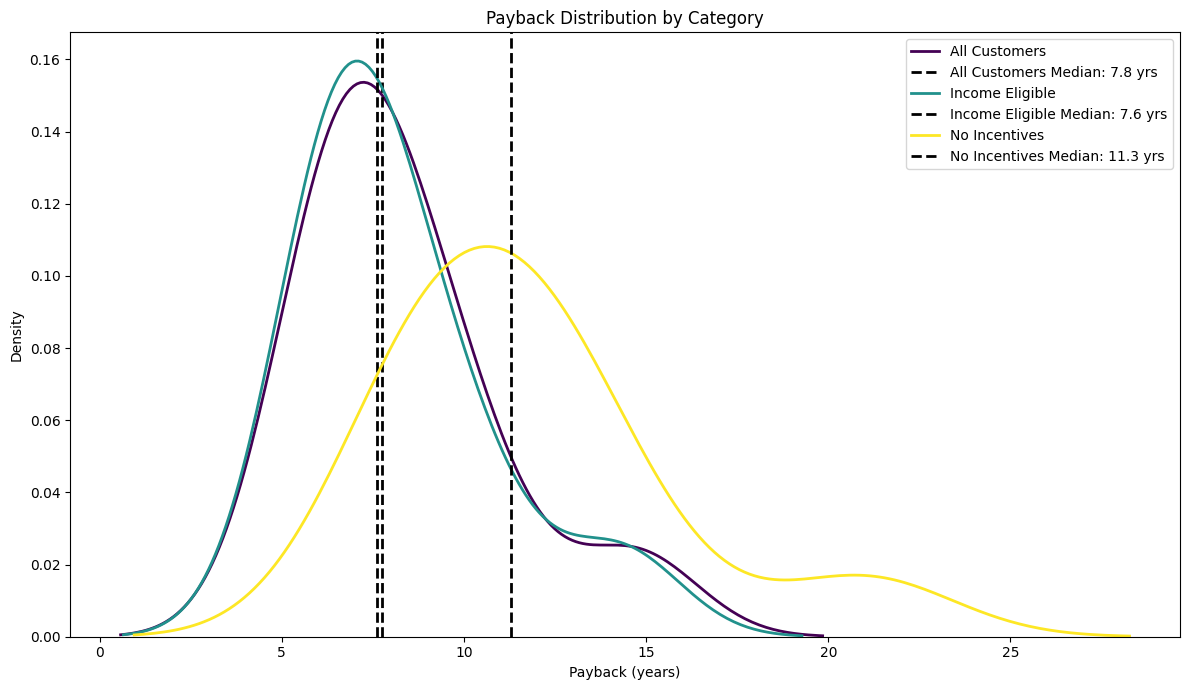

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

paybacks = retrofit_result_costs_check.paybacks[
    ["payback.AllCustomers", "payback.IncomeEligible", "payback.NoIncentives"]
]

labels = [
    "All Customers",
    "Income Eligible",
    "No Incentives",
]
# Use the viridis color scheme for three categories
viridis = plt.cm.get_cmap("viridis", 3)
colors = [viridis(i) for i in range(3)]

plt.figure(figsize=(12, 7))

# Plot histogram and KDE for each payback category
for i, col in enumerate(paybacks.columns):
    sns.kdeplot(
        paybacks[col].dropna(),
        color=colors[i],
        label=f"{labels[i]}",
        linewidth=2,
    )
    # Add median line
    median = paybacks[col].median()
    plt.axvline(
        median,
        color="black",
        linestyle="--",
        linewidth=2,
        label=f"{labels[i]} Median: {median:.1f} yrs",
    )

plt.xlabel("Payback (years)")
plt.ylabel("Density")
plt.title("Payback Distribution by Category")
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
retrofit_result_costs_check.costs_summary

,cost.Thermostat.Controls,cost.Lighting.LED,cost.Cooling.ASHPCooling,cost.Heating.ASHPHeating,cost.Windows.DoublePaneLowE,cost.Total,cost.Weatherization,cost.BasementWallsInsulation,cost.Walls,cost.Equipment,...,net_cost.Heating.ASHPHeating.AllCustomers,net_cost.Windows.DoublePaneLowE.AllCustomers,net_cost.Total.AllCustomers,net_cost.Heating.AllCustomers,net_cost.Thermostat.AllCustomers,net_cost.Windows.AllCustomers,net_cost.DHW.AllCustomers,payback.IncomeEligible,payback.AllCustomers,payback.NoIncentives
mean,505.043951,3274.618706,329.084790,12196.686195,26331.869744,42637.303386,0.0,0.0,0.0,0.0,...,435.517229,25731.869744,30176.134421,0.0,0.0,0.0,0.0,8.173089,8.332740,11.810924
std,38.707736,164.752237,13.036699,881.137969,3533.494290,2939.847631,0.0,0.0,0.0,0.0,...,429.821228,3533.494290,3353.039151,0.0,0.0,0.0,0.0,2.634827,2.716019,3.839852
min,436.230224,2961.107263,315.811458,10111.939448,22449.448583,38819.745214,0.0,0.0,0.0,0.0,...,0.000000,21849.448583,26119.745214,0.0,0.0,0.0,0.0,5.640104,5.716445,8.216245
5%,450.172013,3027.612187,316.561092,10736.454289,22667.124853,38868.365661,0.0,0.0,0.0,0.0,...,0.000000,22067.124853,26168.365661,0.0,0.0,0.0,0.0,5.746835,5.848000,8.242698
10%,464.113801,3094.117111,317.310727,11360.969129,22884.801123,38916.986109,0.0,0.0,0.0,0.0,...,0.000000,22284.801123,26216.986109,0.0,0.0,0.0,0.0,5.853566,5.979555,8.269151
25%,474.198159,3179.690439,319.547701,12066.231350,23487.841576,40829.714212,0.0,0.0,0.0,0.0,...,66.231350,22887.841576,28129.714212,0.0,0.0,0.0,0.0,6.435420,6.465744,8.922273
50%,512.953887,3301.721803,328.110087,12360.847789,25451.605961,42287.540718,0.0,0.0,0.0,0.0,...,360.847789,24851.605961,29587.540718,0.0,0.0,0.0,0.0,7.606664,7.752158,11.298439
75%,531.826998,3418.181119,332.642890,12689.232863,28932.663477,44919.238739,0.0,0.0,0.0,0.0,...,689.232863,28332.663477,32594.426086,0.0,0.0,0.0,0.0,8.986651,9.203798,12.837009
90%,545.246657,3444.818537,337.658626,12884.182485,30456.217367,46456.382071,0.0,0.0,0.0,0.0,...,884.182485,29856.217367,33945.188126,0.0,0.0,0.0,0.0,10.898311,10.968034,15.054838
95%,551.103601,3453.847144,349.273358,13096.556392,31682.027898,46807.986242,0.0,0.0,0.0,0.0,...,1096.556392,31082.027898,35146.419546,0.0,0.0,0.0,0.0,12.593819,12.835607,18.027393


In [7]:
retrofit_result_costs_check.costs[
    ["incentive.Total.IncomeEligible", "incentive.Total.AllCustomers"]
]

,incentive.Total.IncomeEligible,incentive.Total.AllCustomers
0,13233.852084,12700.000000
1,12967.584208,12700.000000
2,10911.939448,10811.939448
3,12299.750205,12199.750205
4,14108.930299,12700.000000
5,12832.447064,12700.000000
6,13352.824567,12700.000000
7,13087.843494,12700.000000
8,13534.702294,12700.000000
9,13636.988283,12700.000000


/var/folders/zf/zdf818b17xvgbgj_4z2v4tgm0000gn/T/ipykernel_42122/3255011607.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(costs_df[col], fill=True, ax=ax)
/var/folders/zf/zdf818b17xvgbgj_4z2v4tgm0000gn/T/ipykernel_42122/3255011607.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(costs_df[col], fill=True, ax=ax)
/var/folders/zf/zdf818b17xvgbgj_4z2v4tgm0000gn/T/ipykernel_42122/3255011607.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(costs_df[col], fill=True, ax=ax)
/var/folders/zf/zdf818b17xvgbgj_4z2v4tgm0000gn/T/ipykernel_42122/3255011607.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(costs_df[col], fill=True, ax=ax)
/var/folders/zf/

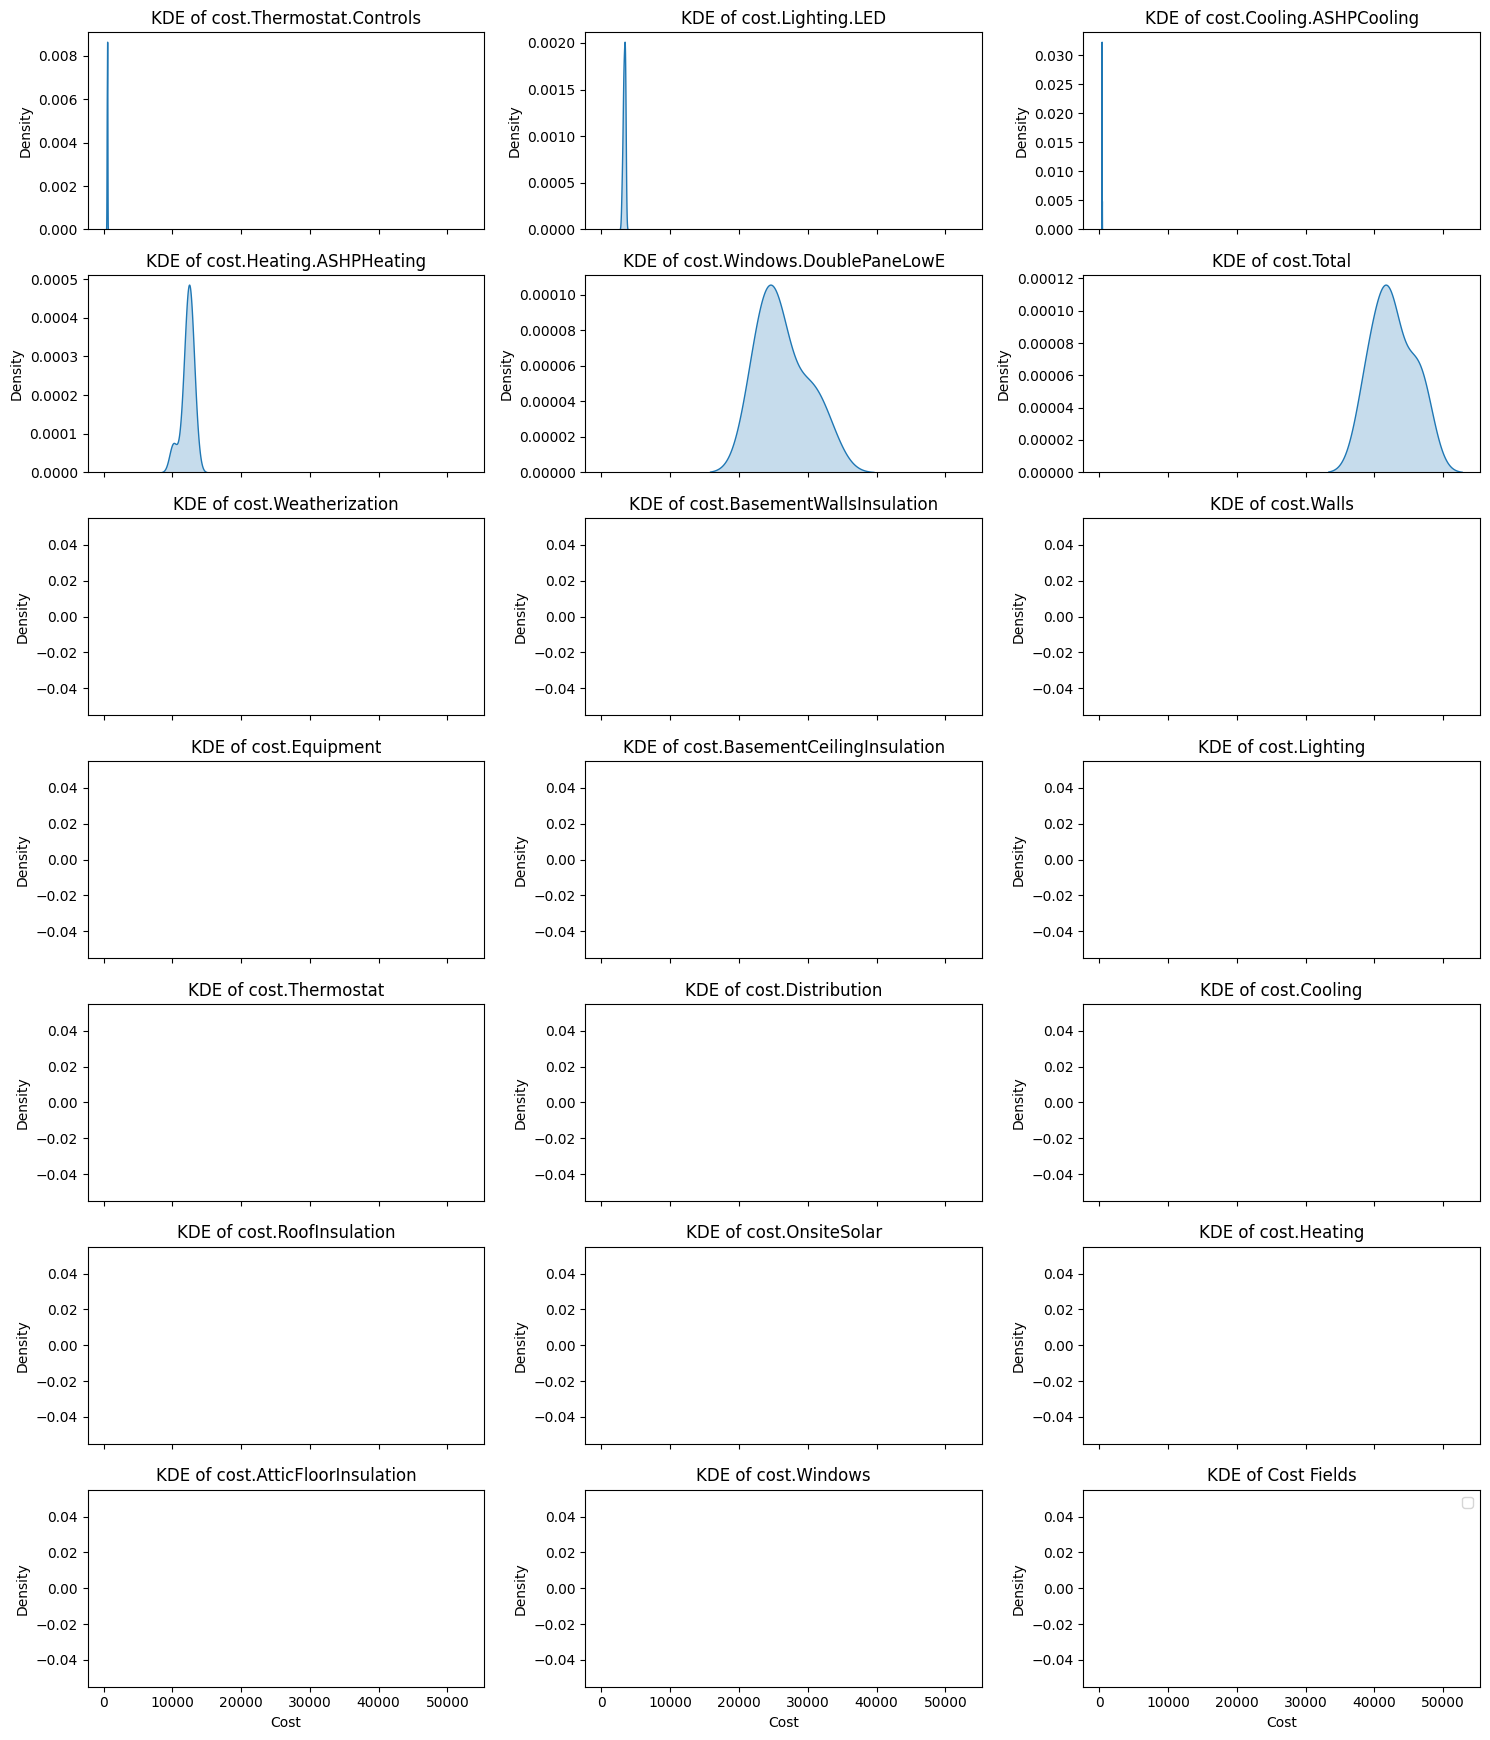

In [8]:
# Select all columns that start with "cost." (excluding incentives, net_cost, payback, etc.)
cost_columns = [
    col for col in retrofit_result_costs_check.costs.columns if col.startswith("cost.")
]
cost_columns = list(dict.fromkeys(cost_columns))

costs_df = retrofit_result_costs_check.costs[cost_columns]
# Remove duplicate columns from costs_df if any
costs_df = costs_df.loc[:, ~costs_df.columns.duplicated()]


ncols = 3
nrows = (len(cost_columns) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 2.5 * nrows), sharex=True)
axes = axes.flatten()
if len(cost_columns) == 1:
    axes = [axes]
for ax, col in zip(axes, cost_columns, strict=False):
    sns.kdeplot(costs_df[col], fill=True, ax=ax)
    ax.set_title(f"KDE of {col}")
    ax.set_xlabel("Cost")
    ax.set_ylabel("Density")
plt.tight_layout()

plt.title("KDE of Cost Fields")
plt.xlabel("Cost")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

## Test solar functioanlity

In [18]:
# Existing Solar
lat = 42.3601
lon = -71.0589
short_edge = 12
long_edge = 12
num_floors = 2
x_0 = 5
y_0 = 0
x_1 = x_0 + short_edge
y_1 = y_0 + long_edge


spec = SBEMInferenceRequestSpec(
    lat=lat,
    lon=lon,
    rotated_rectangle=f"POLYGON (({x_0} {y_0}, {x_0} {y_1}, {x_1} {y_1}, {x_1} {y_0}, {x_0} {y_0}))",
    neighbor_polys=["POLYGON ((-10 0, -10 10, -5 10, -5 0, -10 0))"],
    neighbor_floors=[3],
    short_edge=short_edge,
    long_edge=long_edge,
    num_floors=num_floors,
    orientation=0.000,
    basement="none",
    attic="none",
    semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ACCentral",
        "Heating": "NaturalGasHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "AirDuctsUninsulated",
        # equip/lights/etc
        "Equipment": "LowEfficiencyEquipment",
        "Lighting": "NoLED",
        "Thermostat": "NoControls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePane",
        "OnsiteSolar": "NoSolarPV",
    },
    county="Middlesex",
    source_experiment="ma-webapp/v4-20250814-163347/iter-003/train/0/models",
    current_solar_size_kW=0.0,
    # upgraded_solar_coverage=0.3,
    actual_conditioned_area_m2=250,
)

# results = spec.run(n=1000)
savings_spec = SBEMInferenceSavingsRequestSpec(
    original=spec,
    upgraded_semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ACCentral",
        "Heating": "NaturalGasHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "AirDuctsUninsulated",
        # equip/lights/etc
        "Equipment": "LowEfficiencyEquipment",
        "Lighting": "NoLED",
        "Thermostat": "NoControls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePane",
        "OnsiteSolar": "NoSolarPV",
    },
)

results = savings_spec.run(n=10)
original_results = results["original"]
new_results = results["upgraded"]
delta_results = results["delta"]
retrofit_result = results["retrofit"]

In [19]:
# Existing Solar
lat = 42.3601
lon = -71.0589
short_edge = 12
long_edge = 12
num_floors = 2
x_0 = 5
y_0 = 0
x_1 = x_0 + short_edge
y_1 = y_0 + long_edge


spec = SBEMInferenceRequestSpec(
    lat=lat,
    lon=lon,
    rotated_rectangle=f"POLYGON (({x_0} {y_0}, {x_0} {y_1}, {x_1} {y_1}, {x_1} {y_0}, {x_0} {y_0}))",
    neighbor_polys=["POLYGON ((-10 0, -10 10, -5 10, -5 0, -10 0))"],
    neighbor_floors=[3],
    short_edge=short_edge,
    long_edge=long_edge,
    num_floors=num_floors,
    orientation=0.000,
    basement="none",
    attic="none",
    semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ACCentral",
        "Heating": "NaturalGasHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "AirDuctsUninsulated",
        # equip/lights/etc
        "Equipment": "LowEfficiencyEquipment",
        "Lighting": "NoLED",
        "Thermostat": "NoControls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePane",
        "OnsiteSolar": "NoSolarPV",
    },
    county="Middlesex",
    source_experiment="ma-webapp/v4-20250814-163347/iter-003/train/0/models",
    current_solar_size_kW=0.0,
    # upgraded_solar_coverage=0.3,
    actual_conditioned_area_m2=250,
)

# results = spec.run(n=1000)
savings_spec = SBEMInferenceSavingsRequestSpec(
    original=spec,
    upgraded_semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ACCentral",
        "Heating": "NaturalGasHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "AirDuctsUninsulated",
        # equip/lights/etc
        "Equipment": "LowEfficiencyEquipment",
        "Lighting": "NoLED",
        "Thermostat": "NoControls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePane",
        "OnsiteSolar": "LowSolarPV",
    },
)

results = savings_spec.run(n=10)
original_results = results["original"]
new_results = results["upgraded"]
delta_results = results["delta"]
retrofit_result = results["retrofit"]

In [20]:
original_results.disaggregations

Normalization Normalized                                                      \
Dataset              Raw                                                       
Segment          Cooling Domestic Hot Water  Equipment    Heating   Lighting   
0              51.449091          16.440532  17.866519  28.733074  14.096112   
1              50.862264          16.440550  17.866519  24.837307  14.096142   
2              51.964281          16.440532  17.866499  30.472914  14.096112   
3              52.855761          16.440532  17.866499  30.444410  14.096112   
4              46.299058          16.440536  17.866519  28.005408  14.096112   
5              47.491137          16.440550  17.866545  22.463915  14.096841   
6              53.780527          16.440532  17.866519  25.966178  14.096142   
7              50.021869          16.440532  17.866545  22.614237  14.096841   
8              52.300541          16.440532  17.866545  22.995076  14.096841   
9              51.652059          16.440550  17.866519  28.070798  14.096112   

Normalization                                                                 \
Dataset           EndUse                                                       
Segment          Cooling Domestic Hot Water  Equipment    Heating   Lighting   
0              21.273685          39.435212  17.866519  45.153080  14.096112   
1              19.736858          27.465830  17.866519  37.921021  14.096142   
2              26.042974          36.232064  17.866499  61.401739  14.096112   
3              21.184526          39.868414  17.866499  47.280477  14.096112   
4              17.866864          27.890758  17.866519  43.452924  14.096112   
5              18.617844          37.716008  17.866545  36.586779  14.096841   
6              25.721879          33.802458  17.866519  44.452314  14.096142   
7              24.075806          35.783839  17.866545  42.066634  14.096841   
8              19.287646          38.814289  17.866545  49.778195  14.096841   
9              21.528224          37.228312  17.866519  39.510241  14.096112   

Normalization  ...           Gross                                      \
Dataset        ... EndUseEmissions               FuelCost                
Segment        ...         Heating  Lighting  Electricity   NaturalGas   
0              ...        2.890620  2.163973  4074.662082  1757.376177   
1              ...        2.176901  2.289572  4005.810977  1191.515840   
2              ...        3.892021  2.228947  4451.355186  1837.506669   
3              ...        2.856616  2.148289  4186.017971  1106.999077   
4              ...        2.805855  2.290837  4253.319177  1430.473352   
5              ...        2.315583  2.148390  3296.212241  1393.151700   
6              ...        2.958434  2.190779  4431.081095  1130.493131   
7              ...        2.659825  2.068029  4420.515075  1261.435102   
8              ...        2.797797  2.107700  4073.430511  1614.617720   
9              ...        2.402056  2.024131  4072.816544  1353.996801   

Normalization                                                                   
Dataset                           FuelEmissions                                 
Segment       NetElectricity  Oil   Electricity NaturalGas NetElectricity  Oil  
0                4074.662082  0.0      4.086302   5.415193       4.086302  0.0  
1                4005.810977  0.0      4.198658   3.753609       4.198658  0.0  
2                4451.355186  0.0      4.586065   6.188633       4.586065  0.0  
3                4186.017971  0.0      4.049889   5.265407       4.049889  0.0  
4                4253.319177  0.0      4.049033   4.606826       4.049033  0.0  
5                3296.212241  0.0      3.854345   4.702635       3.854345  0.0  
6                4431.081095  0.0      4.482576   5.208088       4.482576  0.0  
7                4420.515075  0.0      4.110519   4.922397       4.110519  0.0  
8                4073.430511  0.0      3.831418   4.979365      

In [21]:
# Existing Solar
lat = 42.3601
lon = -71.0589
short_edge = 12
long_edge = 12
num_floors = 2
x_0 = 5
y_0 = 0
x_1 = x_0 + short_edge
y_1 = y_0 + long_edge


spec = SBEMInferenceRequestSpec(
    lat=lat,
    lon=lon,
    rotated_rectangle=f"POLYGON (({x_0} {y_0}, {x_0} {y_1}, {x_1} {y_1}, {x_1} {y_0}, {x_0} {y_0}))",
    neighbor_polys=["POLYGON ((-10 0, -10 10, -5 10, -5 0, -10 0))"],
    neighbor_floors=[3],
    short_edge=short_edge,
    long_edge=long_edge,
    num_floors=num_floors,
    orientation=0.000,
    basement="none",
    attic="none",
    semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ACCentral",
        "Heating": "NaturalGasHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "AirDuctsUninsulated",
        # equip/lights/etc
        "Equipment": "LowEfficiencyEquipment",
        "Lighting": "NoLED",
        "Thermostat": "NoControls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePane",
        "OnsiteSolar": "ExistingSolarPV",
    },
    county="Middlesex",
    source_experiment="ma-webapp/v4-20250814-163347/iter-003/train/0/models",
    current_solar_size_kW=10,
    # upgraded_solar_coverage=0.3,
    actual_conditioned_area_m2=250,
)

# results = spec.run(n=1000)
savings_spec = SBEMInferenceSavingsRequestSpec(
    original=spec,
    upgraded_semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ACCentral",
        "Heating": "NaturalGasHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "AirDuctsUninsulated",
        # equip/lights/etc
        "Equipment": "LowEfficiencyEquipment",
        "Lighting": "NoLED",
        "Thermostat": "NoControls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePane",
        "OnsiteSolar": "ExistingSolarPV",
    },
)

results_with_solar = savings_spec.run(n=10)
existing_solar_results = results_with_solar["original"]
new_results = results_with_solar["upgraded"]
delta_results = results_with_solar["delta"]
retrofit_result = results_with_solar["retrofit"]

In [22]:
existing_solar_results.disaggregations

Normalization Normalized                                                      \
Dataset              Raw                                                       
Segment          Cooling Domestic Hot Water  Equipment    Heating   Lighting   
0              51.449091          16.440532  17.866519  28.733074  14.096112   
1              50.862264          16.440550  17.866519  24.837307  14.096142   
2              51.964281          16.440532  17.866499  30.472914  14.096112   
3              52.855761          16.440532  17.866499  30.444410  14.096112   
4              46.299058          16.440536  17.866519  28.005408  14.096112   
5              47.491137          16.440550  17.866545  22.463915  14.096841   
6              53.780527          16.440532  17.866519  25.966178  14.096142   
7              50.021869          16.440532  17.866545  22.614237  14.096841   
8              52.300541          16.440532  17.866545  22.995076  14.096841   
9              51.652059          16.440550  17.866519  28.070798  14.096112   

Normalization                                                                 \
Dataset           EndUse                                                       
Segment          Cooling Domestic Hot Water  Equipment    Heating   Lighting   
0              21.273685          39.435212  17.866519  45.153080  14.096112   
1              19.736858          27.465830  17.866519  37.921021  14.096142   
2              26.042974          36.232064  17.866499  61.401739  14.096112   
3              21.184526          39.868414  17.866499  47.280477  14.096112   
4              17.866864          27.890758  17.866519  43.452924  14.096112   
5              18.617844          37.716008  17.866545  36.586779  14.096841   
6              25.721879          33.802458  17.866519  44.452314  14.096142   
7              24.075806          35.783839  17.866545  42.066634  14.096841   
8              19.287646          38.814289  17.866545  49.778195  14.096841   
9              21.528224          37.228312  17.866519  39.510241  14.096112   

Normalization  ...           Gross                                      \
Dataset        ... EndUseEmissions               FuelCost                
Segment        ...         Heating  Lighting  Electricity   NaturalGas   
0              ...        2.890620  1.128822  4074.662082  1757.376177   
1              ...        2.176901  1.234398  4005.810977  1191.515840   
2              ...        3.892021  1.614124  4451.355186  1837.506669   
3              ...        2.856616  1.222106  4186.017971  1106.999077   
4              ...        2.805855  1.269485  4253.319177  1430.473352   
5              ...        2.315583  1.161222  3296.212241  1393.151700   
6              ...        2.958434  1.171105  4431.081095  1130.493131   
7              ...        2.659825  1.477577  4420.515075  1261.435102   
8              ...        2.797797  1.275877  4073.430511  1614.617720   
9              ...        2.402056  1.124555  4072.816544  1353.996801   

Normalization                                                                   
Dataset                           FuelEmissions                                 
Segment       NetElectricity  Oil   Electricity NaturalGas NetElectricity  Oil  
0                 176.380177  0.0      4.086302   5.415193       0.176884  0.0  
1                 313.568017  0.0      4.198658   3.753609       0.328664  0.0  
2                1995.671566  0.0      4.586065   6.188633       2.056066  0.0  
3                 576.617541  0.0      4.049889   5.265407       0.557866  0.0  
4                 460.699326  0.0      4.049033   4.606826       0.438572  0.0  
5                 267.045894  0.0      3.854345   4.702635       0.312264  0.0  
6                 306.286013  0.0      4.482576   5.208088       0.309845  0.0  
7                1896.273088  0.0      4.110519   4.922397       1.763294  0.0  
8                 858.197128  0.0      3.831418   4.979365      

In [ ]:
existing_solar_results.disaggregations

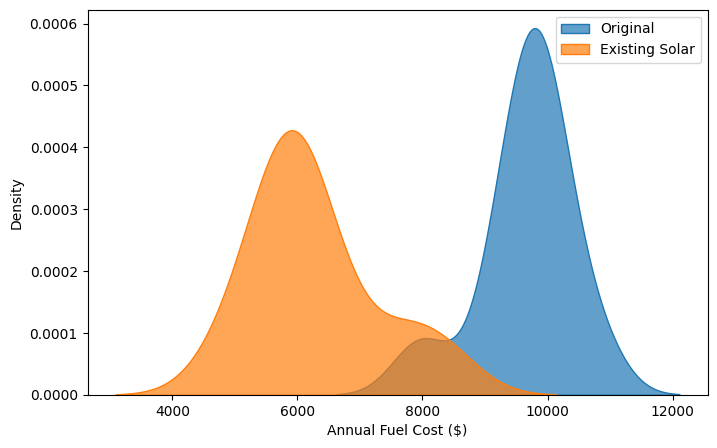

In [6]:
import matplotlib.pyplot as plt

# Extract fuel cost for both cases
original_fuel_cost = original_results.disaggregations["Gross"]["FuelCost"].sum(axis=1)
existing_solar_fuel_cost = existing_solar_results.disaggregations["Gross"][
    "FuelCost"
].sum(axis=1)

import seaborn as sns

plt.figure(figsize=(8, 5))
sns.kdeplot(original_fuel_cost, fill=True, label="Original", alpha=0.7)
sns.kdeplot(existing_solar_fuel_cost, fill=True, label="Existing Solar", alpha=0.7)
plt.xlabel("Annual Fuel Cost ($)")
plt.ylabel("Density")
plt.legend()
plt.show()

In [1]:
# check the metadtaa columns
# View all incentives in the costs DataFrame
incentive_columns = [
    col
    for col in retrofit_result_costs_check.costs.columns
    if "incentive" in col.lower()
]
retrofit_result_costs_check.costs[incentive_columns]

NameError: name 'retrofit_result_costs_check' is not defined

# Compare upgraded solar

In [23]:
# Existing Solar
lat = 42.3601
lon = -71.0589
short_edge = 12
long_edge = 12
num_floors = 2
x_0 = 5
y_0 = 0
x_1 = x_0 + short_edge
y_1 = y_0 + long_edge


spec = SBEMInferenceRequestSpec(
    lat=lat,
    lon=lon,
    rotated_rectangle=f"POLYGON (({x_0} {y_0}, {x_0} {y_1}, {x_1} {y_1}, {x_1} {y_0}, {x_0} {y_0}))",
    neighbor_polys=["POLYGON ((-10 0, -10 10, -5 10, -5 0, -10 0))"],
    neighbor_floors=[3],
    short_edge=short_edge,
    long_edge=long_edge,
    num_floors=num_floors,
    orientation=0.000,
    basement="none",
    attic="none",
    semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ACCentral",
        "Heating": "NaturalGasHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "AirDuctsUninsulated",
        # equip/lights/etc
        "Equipment": "LowEfficiencyEquipment",
        "Lighting": "NoLED",
        "Thermostat": "NoControls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePane",
        "OnsiteSolar": "NoSolarPV",
    },
    county="Middlesex",
    source_experiment="ma-webapp/v4-20250814-163347/iter-003/train/0/models",
    current_solar_size_kW=0.0,
    # upgraded_solar_coverage=0.3,
    actual_conditioned_area_m2=250,
)

# results = spec.run(n=1000)
savings_spec = SBEMInferenceSavingsRequestSpec(
    original=spec,
    upgraded_semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ACCentral",
        "Heating": "NaturalGasHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "AirDuctsUninsulated",
        # equip/lights/etc
        "Equipment": "LowEfficiencyEquipment",
        "Lighting": "NoLED",
        "Thermostat": "NoControls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePane",
        "OnsiteSolar": "LowSolarPV",
    },
)

results_with_low_solar = savings_spec.run(n=10)
original_results_with_low_solar = results_with_low_solar["original"]
new_results_with_low_solar = results_with_low_solar["upgraded"]
delta_results_with_low_solar = results_with_low_solar["delta"]
retrofit_result_with_low_solar = results_with_low_solar["retrofit"]

In [25]:
new_results_with_low_solar.disaggregations

Normalization Normalized                                                      \
Dataset              Raw                                                       
Segment          Cooling Domestic Hot Water  Equipment    Heating   Lighting   
0              51.449091          16.440532  17.866519  28.733074  14.096112   
1              50.862264          16.440550  17.866519  24.837307  14.096142   
2              51.964281          16.440532  17.866499  30.472914  14.096112   
3              52.855761          16.440532  17.866499  30.444410  14.096112   
4              46.299058          16.440536  17.866519  28.005408  14.096112   
5              47.491137          16.440550  17.866545  22.463915  14.096841   
6              53.780527          16.440532  17.866519  25.966178  14.096142   
7              50.021869          16.440532  17.866545  22.614237  14.096841   
8              52.300541          16.440532  17.866545  22.995076  14.096841   
9              51.652059          16.440550  17.866519  28.070798  14.096112   

Normalization                                                                 \
Dataset           EndUse                                                       
Segment          Cooling Domestic Hot Water  Equipment    Heating   Lighting   
0              21.273685          39.435212  17.866519  45.153080  14.096112   
1              19.736858          27.465830  17.866519  37.921021  14.096142   
2              26.042974          36.232064  17.866499  61.401739  14.096112   
3              21.184526          39.868414  17.866499  47.280477  14.096112   
4              17.866864          27.890758  17.866519  43.452924  14.096112   
5              18.617844          37.716008  17.866545  36.586779  14.096841   
6              25.721879          33.802458  17.866519  44.452314  14.096142   
7              24.075806          35.783839  17.866545  42.066634  14.096841   
8              19.287646          38.814289  17.866545  49.778195  14.096841   
9              21.528224          37.228312  17.866519  39.510241  14.096112   

Normalization  ...           Gross                                      \
Dataset        ... EndUseEmissions               FuelCost                
Segment        ...         Heating  Lighting  Electricity   NaturalGas   
0              ...        2.890620  1.893476  4074.662082  1757.376177   
1              ...        2.176901  2.003375  4005.810977  1191.515840   
2              ...        3.892021  1.950329  4451.355186  1837.506669   
3              ...        2.856616  1.879753  4186.017971  1106.999077   
4              ...        2.805855  2.004482  4253.319177  1430.473352   
5              ...        2.315583  1.879841  3296.212241  1393.151700   
6              ...        2.958434  1.916931  4431.081095  1130.493131   
7              ...        2.659825  1.809525  4420.515075  1261.435102   
8              ...        2.797797  1.844237  4073.430511  1614.617720   
9              ...        2.402056  1.771114  4072.816544  1353.996801   

Normalization                                                                   
Dataset                           FuelEmissions                                 
Segment       NetElectricity  Oil   Electricity NaturalGas NetElectricity  Oil  
0                3055.996562  0.0      4.086302   5.415193       3.064726  0.0  
1                3004.358232  0.0      4.198658   3.753609       3.148993  0.0  
2                3338.516389  0.0      4.586065   6.188633       3.439549  0.0  
3                3139.513478  0.0      4.049889   5.265407       3.037417  0.0  
4                3189.989383  0.0      4.049033   4.606826       3.036774  0.0  
5                2472.159181  0.0      3.854345   4.702635       2.890759  0.0  
6                3323.310821  0.0      4.482576   5.208088       3.361932  0.0  
7                3315.386306  0.0      4.110519   4.922397       3.082889  0.0  
8                3055.072883  0.0      3.831418   4.979365      

In [26]:
# Existing Solar
lat = 42.3601
lon = -71.0589
short_edge = 12
long_edge = 12
num_floors = 2
x_0 = 5
y_0 = 0
x_1 = x_0 + short_edge
y_1 = y_0 + long_edge


spec = SBEMInferenceRequestSpec(
    lat=lat,
    lon=lon,
    rotated_rectangle=f"POLYGON (({x_0} {y_0}, {x_0} {y_1}, {x_1} {y_1}, {x_1} {y_0}, {x_0} {y_0}))",
    neighbor_polys=["POLYGON ((-10 0, -10 10, -5 10, -5 0, -10 0))"],
    neighbor_floors=[3],
    short_edge=short_edge,
    long_edge=long_edge,
    num_floors=num_floors,
    orientation=0.000,
    basement="none",
    attic="none",
    semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ACCentral",
        "Heating": "NaturalGasHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "AirDuctsUninsulated",
        # equip/lights/etc
        "Equipment": "LowEfficiencyEquipment",
        "Lighting": "NoLED",
        "Thermostat": "NoControls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePane",
        "OnsiteSolar": "NoSolarPV",
    },
    county="Middlesex",
    source_experiment="ma-webapp/v4-20250814-163347/iter-003/train/0/models",
    current_solar_size_kW=0.0,
    # upgraded_solar_coverage=0.3,
    actual_conditioned_area_m2=250,
)

# results = spec.run(n=1000)
savings_spec = SBEMInferenceSavingsRequestSpec(
    original=spec,
    upgraded_semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ACCentral",
        "Heating": "NaturalGasHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "AirDuctsUninsulated",
        # equip/lights/etc
        "Equipment": "LowEfficiencyEquipment",
        "Lighting": "NoLED",
        "Thermostat": "NoControls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePane",
        "OnsiteSolar": "MedSolarPV",
    },
)

results_with_med_solar = savings_spec.run(n=10)
original_results_with_med_solar = results_with_med_solar["original"]
new_results_with_med_solar = results_with_med_solar["upgraded"]
delta_results_with_med_solar = results_with_med_solar["delta"]
retrofit_result_with_med_solar = results_with_med_solar["retrofit"]

In [27]:
new_results_with_med_solar.disaggregations

Normalization Normalized                                                      \
Dataset              Raw                                                       
Segment          Cooling Domestic Hot Water  Equipment    Heating   Lighting   
0              51.449091          16.440532  17.866519  28.733074  14.096112   
1              50.862264          16.440550  17.866519  24.837307  14.096142   
2              51.964281          16.440532  17.866499  30.472914  14.096112   
3              52.855761          16.440532  17.866499  30.444410  14.096112   
4              46.299058          16.440536  17.866519  28.005408  14.096112   
5              47.491137          16.440550  17.866545  22.463915  14.096841   
6              53.780527          16.440532  17.866519  25.966178  14.096142   
7              50.021869          16.440532  17.866545  22.614237  14.096841   
8              52.300541          16.440532  17.866545  22.995076  14.096841   
9              51.652059          16.440550  17.866519  28.070798  14.096112   

Normalization                                                                 \
Dataset           EndUse                                                       
Segment          Cooling Domestic Hot Water  Equipment    Heating   Lighting   
0              21.273685          39.435212  17.866519  45.153080  14.096112   
1              19.736858          27.465830  17.866519  37.921021  14.096142   
2              26.042974          36.232064  17.866499  61.401739  14.096112   
3              21.184526          39.868414  17.866499  47.280477  14.096112   
4              17.866864          27.890758  17.866519  43.452924  14.096112   
5              18.617844          37.716008  17.866545  36.586779  14.096841   
6              25.721879          33.802458  17.866519  44.452314  14.096142   
7              24.075806          35.783839  17.866545  42.066634  14.096841   
8              19.287646          38.814289  17.866545  49.778195  14.096841   
9              21.528224          37.228312  17.866519  39.510241  14.096112   

Normalization  ...           Gross                                      \
Dataset        ... EndUseEmissions               FuelCost                
Segment        ...         Heating  Lighting  Electricity   NaturalGas   
0              ...        2.890620  1.622980  4074.662082  1757.376177   
1              ...        2.176901  1.717179  4005.810977  1191.515840   
2              ...        3.892021  1.671710  4451.355186  1837.506669   
3              ...        2.856616  1.611217  4186.017971  1106.999077   
4              ...        2.805855  1.718127  4253.319177  1430.473352   
5              ...        2.315583  1.611292  3296.212241  1393.151700   
6              ...        2.958434  1.643084  4431.081095  1130.493131   
7              ...        2.659825  1.551022  4420.515075  1261.435102   
8              ...        2.797797  1.580775  4073.430511  1614.617720   
9              ...        2.402056  1.518098  4072.816544  1353.996801   

Normalization                                                                   
Dataset                           FuelEmissions                                 
Segment       NetElectricity  Oil   Electricity NaturalGas NetElectricity  Oil  
0                2037.331041  0.0      4.086302   5.415193       2.043151  0.0  
1                2002.905488  0.0      4.198658   3.753609       2.099329  0.0  
2                2225.677593  0.0      4.586065   6.188633       2.293032  0.0  
3                2093.008986  0.0      4.049889   5.265407       2.024945  0.0  
4                2126.659589  0.0      4.049033   4.606826       2.024516  0.0  
5                1648.106121  0.0      3.854345   4.702635       1.927173  0.0  
6                2215.540548  0.0      4.482576   5.208088       2.241288  0.0  
7                2210.257537  0.0      4.110519   4.922397       2.055259  0.0  
8                2036.715255  0.0      3.831418   4.979365      

In [41]:
# Existing Solar
lat = 42.3601
lon = -71.0589
short_edge = 15
long_edge = 15
num_floors = 5
x_0 = 5
y_0 = 0
x_1 = x_0 + short_edge
y_1 = y_0 + long_edge


spec = SBEMInferenceRequestSpec(
    lat=lat,
    lon=lon,
    rotated_rectangle=f"POLYGON (({x_0} {y_0}, {x_0} {y_1}, {x_1} {y_1}, {x_1} {y_0}, {x_0} {y_0}))",
    neighbor_polys=["POLYGON ((-10 0, -10 10, -5 10, -5 0, -10 0))"],
    neighbor_floors=[3],
    short_edge=short_edge,
    long_edge=long_edge,
    num_floors=num_floors,
    orientation=0.000,
    basement="unoccupied_unconditioned",
    attic="unoccupied_conditioned",
    semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ACCentral",
        "Heating": "NaturalGasHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "HotWaterUninsulated",
        # equip/lights/etc
        "Equipment": "HighEfficiencyEquipment",
        "Lighting": "NoLED",
        "Thermostat": "Controls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePane",
        "OnsiteSolar": "NoSolarPV",
    },
    county="Middlesex",
    source_experiment="ma-webapp/v4-20250814-163347/iter-003/train/0/models",
    current_solar_size_kW=0.0,
    # upgraded_solar_coverage=0.3,
    actual_conditioned_area_m2=15345,
)

# results = spec.run(n=1000)
savings_spec = SBEMInferenceSavingsRequestSpec(
    original=spec,
    upgraded_semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ACCentral",
        "Heating": "NaturalGasHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "HotWaterUninsulated",
        # equip/lights/etc
        "Equipment": "HighEfficiencyEquipment",
        "Lighting": "LED",
        "Thermostat": "Controls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePane",
        "OnsiteSolar": "MaxSolarPV",
    },
)

results_with_high_solar = savings_spec.run(n=10)
original_results_with_high_solar = results_with_high_solar["original"]
new_results_with_high_solar = results_with_high_solar["upgraded"]
delta_results_with_high_solar = results_with_high_solar["delta"]
retrofit_result_with_high_solar = results_with_high_solar["retrofit"]

In [42]:
new_results_with_high_solar.disaggregations_summary

Normalization Normalized                                                     \
Dataset              Raw                                                      
Segment          Cooling Domestic Hot Water  Equipment    Heating  Lighting   
mean           29.857795          13.770919  10.475513  23.541857  5.407692   
std             1.975790           0.001817   0.003031   2.038254  0.007988   
min            27.119099          13.768843  10.471714  20.375270  5.394618   
5%             27.387255          13.768843  10.472263  20.732010  5.398031   
10%            27.655411          13.768843  10.472813  21.088751  5.401443   
25%            28.375832          13.769296  10.472968  22.249224  5.402649   
50%            29.864509          13.770784  10.474500  23.600501  5.406845   
75%            31.000582          13.772111  10.478495  24.824305  5.414185   
90%            32.683286          13.772774  10.478711  26.042462  5.417002   
95%            32.703856          13.773531  10.479371  26.393785  5.418774   
max            32.724427          13.774288  10.480031  26.745109  5.420547   

Normalization                                                                \
Dataset           EndUse                                                      
Segment          Cooling Domestic Hot Water  Equipment    Heating  Lighting   
mean           11.885238          27.673149  10.475513  37.379000  5.407692   
std             2.193355           2.761673   0.003031   6.174593  0.007988   
min             9.797688          21.512989  10.471714  31.798369  5.394618   
5%              9.873814          22.504085  10.472263  32.038125  5.398031   
10%             9.949941          23.495180  10.472813  32.277882  5.401443   
25%            10.359060          28.154646  10.472968  32.507817  5.402649   
50%            11.074774          28.774983  10.474500  36.536681  5.406845   
75%            12.988805          29.203554  10.478495  39.378454  5.414185   
90%            15.278027          29.377601  10.478711  41.971224  5.417002   
95%            15.562975          29.629104  10.479371  47.022898  5.418774   
max            15.847923          29.880608  10.480031  52.074571  5.420547   

Normalization  ...           Gross                                          \
Dataset        ... EndUseEmissions                  FuelCost                 
Segment        ...         Heating   Lighting    Electricity    NaturalGas   
mean           ...      142.502937  49.453760  131537.541678  70051.293655   
std            ...       26.718363   2.059271   13690.071133  11926.247658   
min            ...      113.921787  45.950915  102729.739896  50428.812200   
5%             ...      117.367271  46.695609  112469.033867  54836.971755   
10%            ...      120.812755  47.440304  122208.327838  59245.131310   
25%            ...      125.260006  48.209157  125277.517965  62905.330144   
50%            ...      133.125373  49.297023  129983.849803  68908.185497   
75%            ...      153.859505  51.050487  141387.073712  76249.701857   
90%            ...      170.441128  51.930944  146852.207008  79374.320039   
95%            ...      186.522348  52.242201  148173.037719  86701.482358   
max            ...      202.603568  52.553459  149493.868430  94028.644678   

Normalization                                                               \
Dataset                           FuelEmissions                              
Segment       NetElectricity  Oil   Electricity  NaturalGas NetElectricity   
mean           123620.000930  0.0    130.962273  247.898143     123.048428   
std             13797.437648  0.0     11.823742   33.894736      11.909965   
min             95156.824029  0.0    118.584607  189.724760     111.187174   
5%             104150.156810  0.0    119.277564  209.235635     111.224134   
10%            113143.489591  0.0    119.970522  228.746510     111.261095   
25%            118328.052366  0.0    121.580701  234.725890     113.7

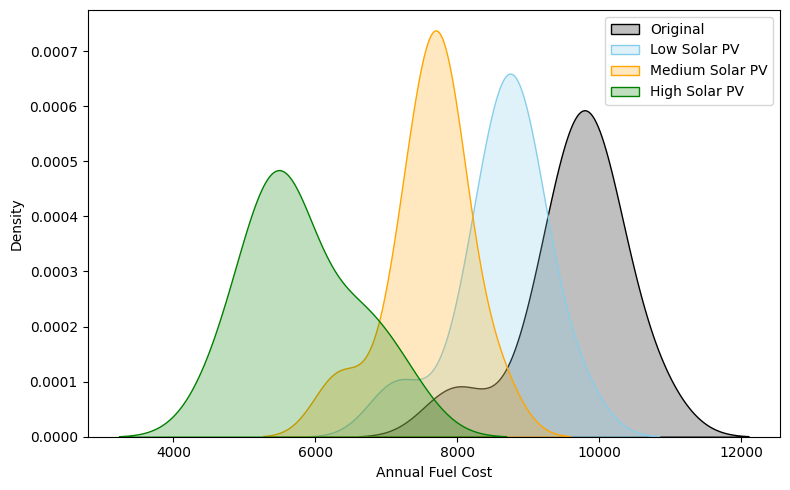

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get total fuel cost samples for each scenario
of_fuel_cost = original_results_with_high_solar.disaggregations["Gross"][
    "FuelCost"
].sum(axis=1)
fuel_cost_low = new_results_with_low_solar.disaggregations["Gross"]["FuelCost"].sum(
    axis=1
)
fuel_cost_med = new_results_with_med_solar.disaggregations["Gross"]["FuelCost"].sum(
    axis=1
)
fuel_cost_high = new_results_with_high_solar.disaggregations["Gross"]["FuelCost"].sum(
    axis=1
)

plt.figure(figsize=(8, 5))
sns.kdeplot(of_fuel_cost, label="Original", fill=True, color="black")
sns.kdeplot(fuel_cost_low, label="Low Solar PV", fill=True, color="skyblue")
sns.kdeplot(fuel_cost_med, label="Medium Solar PV", fill=True, color="orange")
sns.kdeplot(fuel_cost_high, label="High Solar PV", fill=True, color="green")
plt.xlabel("Annual Fuel Cost")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
retrofit_result_with_high_solar.costs

,cost.OnsiteSolar.MaxSolarPV,cost.Total,cost.Weatherization,cost.BasementWallsInsulation,cost.Walls,cost.Equipment,cost.BasementCeilingInsulation,cost.Lighting,cost.Thermostat,cost.Distribution,...,net_cost.Windows.IncomeEligible,net_cost.DHW.IncomeEligible,net_cost.Total.AllCustomers,net_cost.Heating.AllCustomers,net_cost.Thermostat.AllCustomers,net_cost.Windows.AllCustomers,net_cost.DHW.AllCustomers,payback.IncomeEligible,payback.AllCustomers,payback.NoIncentives
0,34352.780672,34352.780672,0,0,0,0,0,0,0,0,...,0,0,34352.780672,0,0,0,0,10.199407,10.199407,10.199407
1,25493.016298,25493.016298,0,0,0,0,0,0,0,0,...,0,0,25493.016298,0,0,0,0,6.364009,6.364009,6.364009
2,29736.530168,29736.530168,0,0,0,0,0,0,0,0,...,0,0,29736.530168,0,0,0,0,8.476268,8.476268,8.476268
3,35077.625815,35077.625815,0,0,0,0,0,0,0,0,...,0,0,35077.625815,0,0,0,0,8.379712,8.379712,8.379712
4,29492.646083,29492.646083,0,0,0,0,0,0,0,0,...,0,0,29492.646083,0,0,0,0,7.131232,7.131232,7.131232
5,41668.653704,41668.653704,0,0,0,0,0,0,0,0,...,0,0,41668.653704,0,0,0,0,12.641375,12.641375,12.641375
6,40438.194853,40438.194853,0,0,0,0,0,0,0,0,...,0,0,40438.194853,0,0,0,0,9.126034,9.126034,9.126034
7,39935.124613,39935.124613,0,0,0,0,0,0,0,0,...,0,0,39935.124613,0,0,0,0,11.465594,11.465594,11.465594
8,28646.401991,28646.401991,0,0,0,0,0,0,0,0,...,0,0,28646.401991,0,0,0,0,7.032500,7.032500,7.032500
9,34659.596900,34659.596900,0,0,0,0,0,0,0,0,...,0,0,34659.596900,0,0,0,0,8.509982,8.509982,8.509982


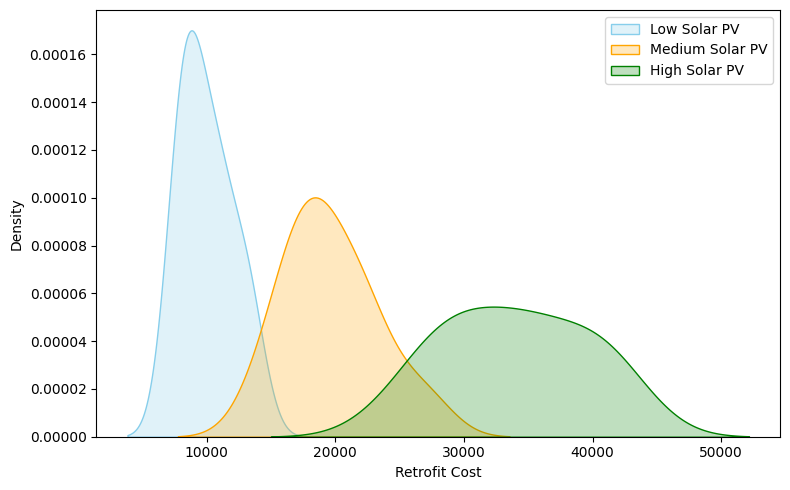

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get total fuel cost samples for each scenario
retrofit_costs_low = retrofit_result_with_low_solar.costs["cost.Total"]
retrofit_costs_med = retrofit_result_with_med_solar.costs["cost.Total"]
retrofit_costs_high = retrofit_result_with_high_solar.costs["cost.Total"]

plt.figure(figsize=(8, 5))
sns.kdeplot(retrofit_costs_low, label="Low Solar PV", fill=True, color="skyblue")
sns.kdeplot(retrofit_costs_med, label="Medium Solar PV", fill=True, color="orange")
sns.kdeplot(retrofit_costs_high, label="High Solar PV", fill=True, color="green")
plt.xlabel("Retrofit Cost")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from epengine.models.inference import (
    SBEMInferenceRequestSpec,
    SBEMInferenceSavingsRequestSpec,
)

test_building = SBEMInferenceRequestSpec(
    lat=42.3823,
    lon=-71.1134,
    rotated_rectangle="POLYGON((231845.183547 903600.714897,231842.179993 903609.134254,231835.553619 903606.770336,231838.557173 903598.350978,231845.183547 903600.714897))",
    neighbor_polys=[
        "POLYGON((231849.51851833385 903625.4161885609,231845.10169384629 903637.3764658588,231834.12396802736 903633.322488931,231838.54079251492 903621.3622116331,231849.51851833385 903625.4161885609))",
        "POLYGON((231801.31566715587 903586.261505722,231796.64450194951 903599.403161624,231789.7533810546 903596.9537317806,231794.42454626094 903583.8120758786,231801.31566715587 903586.261505722))",
        "POLYGON((231817.62048628984 903570.0945800169,231825.51679869025 903550.0961671477,231838.98890067183 903555.4155855753,231831.09258827142 903575.4139984444,231817.62048628984 903570.0945800169))",
        "POLYGON((231832.68054333143 903576.0381962607,231839.62706807058 903558.43545847,231846.5308631144 903561.1598859788,231839.58433837525 903578.7626237695,231832.68054333143 903576.0381962607))",
        "POLYGON((231856.68009962759 903561.55828301,231850.75619921496 903558.5434061474,231853.1204130238 903553.8979868498,231859.04431343643 903556.9128637125,231856.68009962759 903561.55828301))",
        "POLYGON((231856.70368864987 903584.0174784602,231848.54078886413 903580.7925052362,231852.4837178971 903570.8123496436,231860.64661768283 903574.0373228677,231856.70368864987 903584.0174784602))",
        "POLYGON((231812.66332847025 903590.2703308312,231807.30702209877 903605.3666971793,231799.85549594552 903602.7228386446,231805.211802317 903587.6264722965,231812.66332847025 903590.2703308312))",
        "POLYGON((231826.59387426058 903594.0992270354,231822.11152255794 903606.7059251312,231815.55893867873 903604.3761330409,231820.04129038137 903591.7694349452,231826.59387426058 903594.0992270354))",
        "POLYGON((231834.35535927129 903596.8558215349,231830.8592741491 903606.6844609019,231825.44207293264 903604.7575414302,231828.93815805484 903594.9289020633,231834.35535927129 903596.8558215349))",
        "POLYGON((231798.7070550293 903612.8673734525,231799.92456451675 903605.9074664649,231806.25222678855 903607.0143762071,231805.0347173011 903613.9742831946,231798.7070550293 903612.8673734525))",
        "POLYGON((231816.46992052317 903611.1150152637,231814.04747520183 903627.712276186,231804.60830620647 903626.3345867662,231807.0307515278 903609.7373258439,231816.46992052317 903611.1150152637))",
        "POLYGON((231826.32933810964 903621.9509876291,231833.66758781264 903624.3651122309,231831.37797538124 903631.3248804766,231824.03972567825 903628.9107558748,231826.32933810964 903621.9509876291))",
        "POLYGON((231850.78790224632 903603.4714424752,231846.98426587172 903614.1510555595,231842.09177048618 903612.4085511012,231845.89540686077 903601.7289380169,231850.78790224632 903603.4714424752))",
        "POLYGON((231861.59681016428 903585.9503969224,231865.6461411941 903575.6817475482,231873.7930650863 903578.8943990383,231869.74373405648 903589.1630484127,231861.59681016428 903585.9503969224))",
        "POLYGON((231867.98196703382 903572.7043338609,231874.06180370867 903564.3264908798,231884.93722623866 903572.2188317722,231878.8573895638 903580.5966747535,231867.98196703382 903572.7043338609))",
        "POLYGON((231895.7886391157 903618.0210673723,231888.62839772145 903628.9040511148,231877.05076173262 903621.2867771746,231884.21100312687 903610.4037934319,231895.7886391157 903618.0210673723))",
    ],
    neighbor_floors=[2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 2, 2, 2, 3, 3],
    short_edge=7.03541,
    long_edge=8.93907,
    num_floors=2,
    orientation=1.91347,
    basement="unoccupied_unconditioned",
    attic="unoccupied_unconditioned",
    actual_conditioned_area_m2=114.735205,
    source_experiment="ma-webapp/v4-20250814-163347/iter-003/train/0/models",
    semantic_field_context={
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "pre_1975",
        "Walls": "SomeInsulationWalls",
        "RoofInsulation": "UninsulatedRoof",
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "Weatherization": "LeakyEnvelope",
        "Windows": "SinglePane",
        "Heating": "OilHeating",
        "Cooling": "ACWindow",
        "Distribution": "HotWaterUninsulated",
        "DHW": "ElectricResistanceDHW",
        "Lighting": "NoLED",
        "Equipment": "LowEfficiencyEquipment",
        "Thermostat": "NoControls",
    },
    county="Middlesex",
)

energy_results = test_building.run(n=10)

In [7]:
savings_spec = SBEMInferenceSavingsRequestSpec(
    original=test_building,
    upgraded_semantic_field_context={
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "pre_1975",
        "Walls": "SomeInsulationWalls",
        "RoofInsulation": "UninsulatedRoof",
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "Weatherization": "LeakyEnvelope",
        "Windows": "DoublePaneLowE",
        "Heating": "ASHPHeating",
        "Cooling": "ACWindow",
        "Distribution": "HotWaterUninsulated",
        "DHW": "HPWH",
        "Lighting": "LED",
        "Equipment": "HighEfficiencyEquipment",
        "Thermostat": "Controls",
    },
)

energy_results = savings_spec.run(n=10)

In [9]:
test_results = energy_results["original"]
test_results_upgraded = energy_results["upgraded"]
test_results_delta = energy_results["delta"]
test_results_retrofit = energy_results["retrofit"]

In [10]:
test_results_retrofit.costs_summary

,cost.Equipment.HighEfficiencyEquipment,cost.DHW.HPWH,cost.Thermostat.Controls,cost.Windows.DoublePaneLowE,cost.Heating.ASHPHeating,cost.Lighting.LED,cost.Total,cost.Cooling,cost.Thermostat,cost.DHW,...,cost.Lighting,cost.RoofInsulation,cost.Distribution,cost.BasementCeilingInsulation,cost.Windows,cost.Walls,cost.Heating,cost.Equipment,cost.AtticFloorInsulation,payback
mean,4320.548722,2968.301075,508.578962,12003.898049,18219.923493,1426.189972,39447.440274,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.650280
std,156.468727,138.598090,12.961620,1333.046725,969.539198,85.113298,1752.058320,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.365723
min,4065.081114,2757.420014,487.448005,10650.473025,16605.484816,1284.403104,36789.110052,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.981387
p5,4088.897571,2800.730206,490.494063,10661.789222,16921.922540,1311.990608,36967.251077,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.002212
p10,4112.714028,2844.040399,493.540121,10673.105418,17238.360263,1339.578113,37145.392101,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.023037
p25,4305.591242,2882.152695,502.456558,10996.148270,17483.423922,1367.646490,38343.994113,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.358165
p50,4330.549618,2957.035703,506.952996,11646.814990,18435.410435,1410.813620,39663.049971,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.110658
p75,4337.894581,3044.870392,516.522786,12280.656963,18797.619050,1496.880406,40676.423711,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.885842
p90,4449.471175,3121.413741,523.023331,13986.550879,19240.412683,1526.586849,41273.165795,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.609656
p95,4544.128222,3178.003984,527.022129,14289.249222,19502.857174,1535.179086,41614.750456,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142.415453


In [10]:
test_results_retrofit.costs_summary.payback

mean    1.878534e+06
std     1.004450e+06
min     3.660603e+01
p5      3.831869e+01
p10     4.003134e+01
p25     2.115176e+06
p50     2.266528e+06
p75     2.436325e+06
p90     2.523943e+06
p95     2.600674e+06
max     2.677406e+06
Name: payback, dtype: float64

In [11]:
{key: value.serialized.model_dump(mode="json") for key, value in energy_results.items()}

{'original': {'Disaggregation': {'Normalized': {'Raw': {'Lighting': {'min': 14.09187263457236,
      'max': 14.096911112447417,
      'mean': 14.09423222963633,
      'std': 0.0014537299464569809,
      'units': 'kWh/m2',
      'p5': 14.091889584376036,
      'p10': 14.091906534179712,
      'p25': 14.094235376127019,
      'p50': 14.094440929301088,
      'p75': 14.094749496229756,
      'p90': 14.094974288595381,
      'p95': 14.095942700521398},
     'Equipment': {'min': 17.860406992698437,
      'max': 17.862191426937205,
      'mean': 17.861054008181622,
      'std': 0.0005797506067119262,
      'units': 'kWh/m2',
      'p5': 17.860454188862967,
      'p10': 17.860501385027494,
      'p25': 17.86060113292539,
      'p50': 17.860932192588002,
      'p75': 17.861304966680144,
      'p90': 17.861822843348364,
      'p95': 17.862007135142786},
     'DomesticHotWater': {'min': 16.441966184990683,
      'max': 16.44312727141461,
      'mean': 16.44242880278413,
      'std': 0.0005894836

In [2]:
from epengine.models.inference import (
    SBEMInferenceRequestSpec,
    SBEMInferenceSavingsRequestSpec,
)

test_building = SBEMInferenceRequestSpec(
    actual_conditioned_area_m2=1146.887535,
    attic="unoccupied_unconditioned",
    basement="unoccupied_unconditioned",
    county="Middlesex",
    current_solar_size_kW=4,
    lat=42.3561,
    lon=-71.107,
    long_edge=15.9182,
    neighbor_floors=[1, 3, 2, 2, 2, 2, 2, 2, 4, 2, 3],
    neighbor_polys=[
        "POLYGON((232383.64474864397 900674.0452220528,232362.2216815091 900690.0812721052,232348.85406534665 900672.2230503147,232370.2771324815 900656.1870002623,232383.64474864397 900674.0452220528))",
        "POLYGON((232365.77531740943 900673.2752966152,232354.6508671402 900681.7093300722,232349.29387258418 900674.6434795707,232360.4183228534 900666.2094461138,232365.77531740943 900673.2752966152))",
        "POLYGON((232385.76361300104 900686.4214691704,232373.67283790116 900695.7226512948,232367.2954208019 900687.4325313042,232379.38619590178 900678.1313491798,232385.76361300104 900686.4214691704))",
        "POLYGON((232338.55243551527 900703.2509754621,232328.33373560297 900690.0094056233,232333.30066461588 900686.1763588104,232343.51936452818 900699.4179286492,232338.55243551527 900703.2509754621))",
        "POLYGON((232339.36176465574 900711.1648746133,232348.09523954144 900704.4383974922,232352.70617327152 900710.4251083968,232343.97269838583 900717.1515855179,232339.36176465574 900711.1648746133))",
        "POLYGON((232332.46122082992 900710.045471194,232337.87409304775 900713.5915443492,232334.61810794024 900718.5616142149,232329.20523572242 900715.0155410597,232332.46122082992 900710.045471194))",
        "POLYGON((232347.4530182113 900720.9075000698,232355.1741744423 900715.1781107164,232358.97143690265 900720.2954547993,232351.25028067164 900726.0248441529,232347.4530182113 900720.9075000698))",
        "POLYGON((232390.3844780409 900731.738424635,232377.94201952545 900715.568773167,232387.02930243005 900708.5761585901,232399.4717609455 900724.7458100582,232390.3844780409 900731.738424635))",
        "POLYGON((232417.8371633406 900729.7398710747,232394.9063047759 900699.1896158576,232425.0114382464 900676.592863301,232447.9422968111 900707.1431185182,232417.8371633406 900729.7398710747))",
        "POLYGON((232351.8879399844 900745.0002618162,232343.5296579367 900734.4045997933,232359.96164321556 900721.4423924986,232368.31992526323 900732.0380545214,232351.8879399844 900745.0002618162))",
        "POLYGON((232415.44813648064 900734.4179056261,232400.47364167514 900745.8045384372,232393.2112214493 900736.2537716958,232408.1857162548 900724.8671388848,232415.44813648064 900734.4179056261))",
    ],
    num_floors=3,
    orientation=2.50515,
    rotated_rectangle="POLYGON((232387.154884 900700.075566,232374.353186 900709.536376,232368.32771 900701.383128,232381.129408 900691.922319,232387.154884 900700.075566))",
    semantic_field_context={
        "Age_bracket": "pre_1975",
        "AtticFloorInsulation": "Insulated",
        "AtticVentilation": "VentilatedAttic",
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        "Cooling": "ACCentral",
        "DHW": "NaturalGasDHW",
        "Distribution": "HotWaterUninsulated",
        "Equipment": "HighEfficiencyEquipment",
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "Heating": "OilHeating",
        "Lighting": "LED",
        "OnsiteSolar": "NoSolarPV",
        "Region": "MA",
        "RoofInsulation": "UninsulatedRoof",
        "Thermostat": "Controls",
        "Typology": "MFH",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePaneStormWindows",
    },
    short_edge=10.1381,
    source_experiment="ma-webapp/v4-20250814-163347/iter-003/train/0/models",
)
savings_spec = SBEMInferenceSavingsRequestSpec(
    original=test_building,
    upgraded_semantic_field_context={
        "Age_bracket": "pre_1975",
        "AtticFloorInsulation": "Insulated",
        "AtticVentilation": "VentilatedAttic",
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        "Cooling": "ACCentral",
        "DHW": "NaturalGasDHW",
        "Distribution": "HotWaterUninsulated",
        "Equipment": "HighEfficiencyEquipment",
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "Heating": "OilHeating",
        "Lighting": "LED",
        "OnsiteSolar": "MaxSolarPV",
        "Region": "MA",
        "RoofInsulation": "UninsulatedRoof",
        "Thermostat": "Controls",
        "Typology": "MFH",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePaneStormWindows",
    },
)

results_with_solar = savings_spec.run(n=10)
existing_solar_results = results_with_solar["original"]
new_results = results_with_solar["upgraded"]
delta_results = results_with_solar["delta"]
retrofit_result = results_with_solar["retrofit"]

/Users/daryaguettler/epengine/.venv/lib/python3.12/site-packages/archetypal/__init__.py:16: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution
